Quantum Fourier Transform

# **Part-C: Programming Implementation (Python / Qiskit)**

## 1. Implement a Python function qft(n) that builds the Quantum Fourier Transform (QFT) circuit for n qubits using Qiskit. Give a decomposition of the controlled-phase gate into single-qubit and CNOT gates.

In [1]:
import numpy as np
from qiskit import QuantumCircuit
# from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from numpy import pi
from qiskit.circuit.library import QFT

In [2]:
def qft(n):
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(i)
        for j in range(i+1, n):
            qc.cp(pi / (2 ** (j - i)), j, i)
    qc.reverse_bits()
    return qc


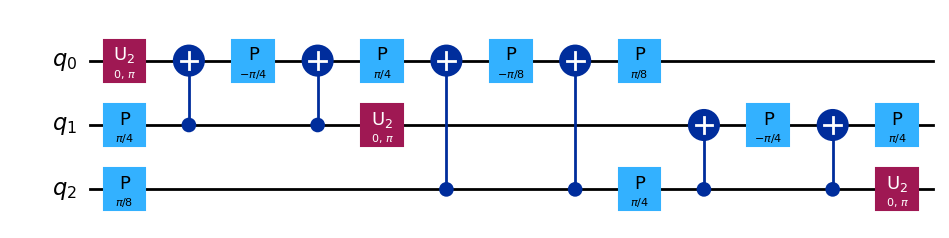

In [3]:
n_qubits = 3
qft_circ = qft(n_qubits)
# qft_circ.draw("mpl")
qft_circ.decompose().draw("mpl")



## 2. Apply the QFT circuit on the basis state |5⟩ for n = 4. Print the resulting quantum statevector and verify that the amplitudes match the expected Fourier coefficients.


In [4]:
n = 4
x_val = 5
N = 2**n
qc = QuantumCircuit(n)

bin_x = format(x_val, f'0{n}b')
for i, bit in enumerate(reversed(bin_x)):
    if bit == '1':
        qc.x(i)

# Apply QFT
# NOT WORKING, as expected
# qc.append(qft(n_qubits), range(n_qubits))
# NOT WORKING, as expected
qc.append(QFT(num_qubits=n, do_swaps=False), range(n))

# Get statevector
statevec = Statevector.from_instruction(qc)

expected_amps = []
for y in range(N):
    amp = np.exp(2j * np.pi * x_val * y / N) / np.sqrt(N)
    expected_amps.append(amp)

print(f"{'|y⟩':>6} {'Simulated Amplitude':>30} {'Expected Amplitude':>30} {'Difference':>15}")
print("-" * 90)
for y in range(N):
    sim_amp = statevec.data[y]
    exp_amp = expected_amps[y]
    diff = abs(sim_amp - exp_amp)
    print(f"|{y:04b}⟩ {sim_amp:>30.6f} {exp_amp:>30.6f} {diff:>15.2e}")



   |y⟩            Simulated Amplitude             Expected Amplitude      Difference
------------------------------------------------------------------------------------------
|0000⟩             0.250000+0.000000j             0.250000+0.000000j        8.33e-17
|0001⟩            -0.250000+0.000000j            -0.095671+0.230970j        2.78e-01
|0010⟩             0.000000+0.250000j            -0.176777-0.176777j        4.62e-01
|0011⟩            -0.000000-0.250000j             0.230970-0.095671j        2.78e-01
|0100⟩            -0.176777-0.176777j             0.000000+0.250000j        4.62e-01
|0101⟩             0.176777+0.176777j            -0.230970-0.095671j        4.90e-01
|0110⟩             0.176777-0.176777j             0.176777-0.176777j        3.10e-16
|0111⟩            -0.176777+0.176777j             0.095671+0.230970j        2.78e-01
|1000⟩            -0.095671+0.230970j            -0.250000+0.000000j        2.78e-01
|1001⟩             0.095671-0.230970j             0.095671-

## 3. Implement the inverse QFT and show that applying QFT followed by inverse QFT (iqft) recovers the original state for several test inputs.


In [5]:
def inverse_qft(n: int) -> QuantumCircuit:
    qc = QuantumCircuit(n)
    for i in reversed(range(n)):
        for j in range(i):
            angle = -pi / (2 ** (i - j))
            qc.cp(angle, j, i)
        qc.h(i)
    return qc



def test_qft_iqft(n, x_vals):
    for x_val in x_vals:
        print(f"\nTesting input state |{x_val}⟩ with {n} qubits")

        qc = QuantumCircuit(n)
        bin_x = format(x_val, f'0{n}b')
        for i, bit in enumerate(reversed(bin_x)):
            if bit == '1':
                qc.x(i)

        original_sv = Statevector.from_instruction(qc)

        # NOT WORKING, as expected
        # qft_circ = qft(n)
        # iqft_circ = inverse_qft(n)
        # NOT WORKING, as expected
        qft_circ = QFT(n, do_swaps=False)
        iqft_circ = QFT(n, do_swaps=False).inverse()
        qc.append(qft_circ, range(n))
        qc.append(iqft_circ, range(n))

        final_sv = Statevector.from_instruction(qc)

        assert np.allclose(original_sv.data, final_sv.data, atol=1e-10), "Mismatch!"

# Parameters
n = 4
x_vals = [0, 1, 5, 8, 15]

test_qft_iqft(n, x_vals)



Testing input state |0⟩ with 4 qubits

Testing input state |1⟩ with 4 qubits

Testing input state |5⟩ with 4 qubits

Testing input state |8⟩ with 4 qubits

Testing input state |15⟩ with 4 qubits
